### Part I: Research Question

**A. Describe the purpose of this data mining report by doing the following:**

**1. Propose one question relevant to a real-world organizational situation that you will answer using one of the following clustering techniques:**



* k-means

* hierarchical

A critical component in patient relationship management is understanding the conditions leading to hospital admissions. When a hospital is able to better understand its patients’ characteristics, they are able to target treatment to patients, resulting in more effective cost of care for the hospital in the long term.

In this analysis, the research questions is **can we better understand the characteristics of the hospital's patients?** This analysis will use k-means clustering to analyze patient data to identify the principal variables of the hospital's patients, ultimately allowing better business and strategic decision-making for the hospital.


**2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.**

The goal for this analysis is to get a better understanding of the characteristics of the hospital patients that are readmitted into the hospital to help improve the hospital's long term cost effectiveness. This analysis will be using k-means clustering to analyze patient data to better inform the research question.

### Part II: Technique Justification

**B. Explain the reasons for your chosen clustering technique from part A1 by doing the following:**

**1. Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.**

One advantage of k-means clustering technique is that the analysis provides a clear and easily interpreted result. The analysis assigns each data point to a specific cluster which makes the interpretation straightforward. As such, an expected outcome is that this analysis will return data that belongs to a cluster.

**2. Summarize one assumption of the clustering technique.**

One assumption of the k-means analysis is that there is a predefined number of clusters. Prior to running the analysis, there needs to be a predetermined amount of clusters defined (k). This is important as there needs to be knowledge of the data to appropriately determine the amount of clusters. Choosing an inappropriate k value can lead to suboptimal results.

Another assumption of the k-means analysis that that the defined data must be numerical. K-means is designed to work with distances between data points, therefore if the data includes non-numerical data, k-means analysis is not able to run on the data without preprocessing or transformation of the data.


**3. List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.**

The following packages will be used in our analysis:

* numpy - used to manage the data and support arrays
* pandas (Series, DataFrame) - used to manage the dataframe
* seaborn - used for data visualizations
* matplotlib.pyplot - used for data visualizations
* sklearn.preprocessing (StandardScaler) - used to scale the data
* sklearn.cluster (KMeans) - used for the K-Means cluster analysis
* yellowbrick.cluster (KElbowVisualizer) - used for the K-Means cluster analysis and Elbow Method visualization

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D207\Medical Data - 207\medical_clean.csv")

### Part III: Data Preparation

**C.  Perform data preparation for the chosen dataset by doing the following**

**1.  Describe one data preprocessing goal relevant to the clustering technique from part A1.**

One major preprocessing goal for this analysis is feature scaling. We will need to scale the features to have similar ranges since K-means analysis uses distance based calculations. 

Additionally, as best practice, we will scan the dataset for missing data, outliers, and preprocess categorical variables to prepare for this analysis.

**2.  Identify the initial dataset variables that you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.**

*Please note that numerical describes both discrete and continuous variables*

The initial dataset variables for the analysis are as follows:

In [3]:
# Rename the last 8 columns to reflect what the variables measure 

df.rename(columns = {
    'Item1':'TimelyAdmission',
    'Item2':'TimelyTreatment',
    'Item3':'TimelyVisits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'TreatmentTime',
    'Item7':'Courteous',
    'Item8':'ActiveListening'
}, inplace=True)

df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListening'],
      dtype='object')

In [4]:
for c in df.loc[:, df.columns]: # We are looking for columns in df
    if df.dtypes[c] == "object": # select columns that dtype = object
        print('\n{} is categorical.'.format(c, df[c].unique()))
    if df.dtypes[c] == "int64":
        print('\n{} is numerical.'.format(c))
    if df.dtypes[c] == "float64":
        print('\n{} is numerical'.format(c))


CaseOrder is numerical.

Customer_id is categorical.

Interaction is categorical.

UID is categorical.

City is categorical.

State is categorical.

County is categorical.

Zip is numerical.

Lat is numerical

Lng is numerical

Population is numerical.

Area is categorical.

TimeZone is categorical.

Job is categorical.

Children is numerical.

Age is numerical.

Income is numerical

Marital is categorical.

Gender is categorical.

ReAdmis is categorical.

VitD_levels is numerical

Doc_visits is numerical.

Full_meals_eaten is numerical.

vitD_supp is numerical.

Soft_drink is categorical.

Initial_admin is categorical.

HighBlood is categorical.

Stroke is categorical.

Complication_risk is categorical.

Overweight is categorical.

Arthritis is categorical.

Diabetes is categorical.

Hyperlipidemia is categorical.

BackPain is categorical.

Anxiety is categorical.

Allergic_rhinitis is categorical.

Reflux_esophagitis is categorical.

Asthma is categorical.

Services is categorical.


**3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.**

This analysis will go through the following steps to prepare the data for k-means clustering analysis:

* Load the data into the data frame using pd.get_csv()
* View the data using the describe() and .columns and evaluate the data structures and data types using .dtypes
* Rename the columns to give proper naming for the predictors
* Identify, remove, and remedy null values and missing data from our data set
* Convert categorical variables into dummy variables, if necessary
* Look for any outliers in data using data visualizaion


The code for these data preparation steps are provided in the annotated code below.
<br>

**4.  Provide a copy of the cleaned dataset.**

A copy of the clean dataset is provided with the submission of this perfomance assessment.

In [5]:
# let's look at our data
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,TimelyAdmission,TimelyTreatment,TimelyVisits,Reliability,Options,TreatmentTime,Courteous,ActiveListening
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [6]:
# Rename the last 8 columns to reflect what the variables measure

df.rename(columns = {
    'Item1':'TimelyAdmission',
    'Item2':'TimelyTreatment',
    'Item3':'TimelyVisits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'TreatmentTime',
    'Item7':'Courteous',
    'Item8':'ActiveListening'
}, inplace=True)

df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListening'],
      dtype='object')

In [7]:
# Check for missing values
display(df.isnull().any())

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [8]:
df.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

In [9]:
# Now we will drop variables that are not relevant / measurable to the research question

df = df.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital',
       'CaseOrder', 'Zip', 'Lat', 'Lng','TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListening', 'Population'], axis=1)

The following variables have been dropped from the analysis:
* **'Customer_id', 'Interaction', 'UID', 'CaseOrder'**: These are not informative to the research questions, they are used to identify the patient and the interaction
* **'City', 'State', 'County', 'Area', 'TimeZone', 'Zip', 'Lat', 'Lng', 'Population'**: For this analysis, we will not be considering location or data regarding a patient's area of living.
* **'Job', 'Marital'**: For this analysis, we will not be considering a patients occupation or marital status.
* **Survey Results ('TimelyAdmission', 'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options', 'TreatmentTime', 'Courteous', 'ActiveListening')**: For this analysis, we will not be considering survey results since they do not inform the research question.

In [10]:
df_add = df.loc[(df.ReAdmis =="Yes")]
df_add.shape

(3669, 27)

In [11]:
# variable for categorical data
cat_cols = df_add.select_dtypes(include="object").columns
print(cat_cols)

Index(['Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood',
       'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')


In [12]:
# filter numerical variables
num_cols = df_add.select_dtypes(include="float")
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3669 entries, 5000 to 9999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              3669 non-null   float64
 1   VitD_levels         3669 non-null   float64
 2   Initial_days        3669 non-null   float64
 3   TotalCharge         3669 non-null   float64
 4   Additional_charges  3669 non-null   float64
dtypes: float64(5)
memory usage: 172.0 KB


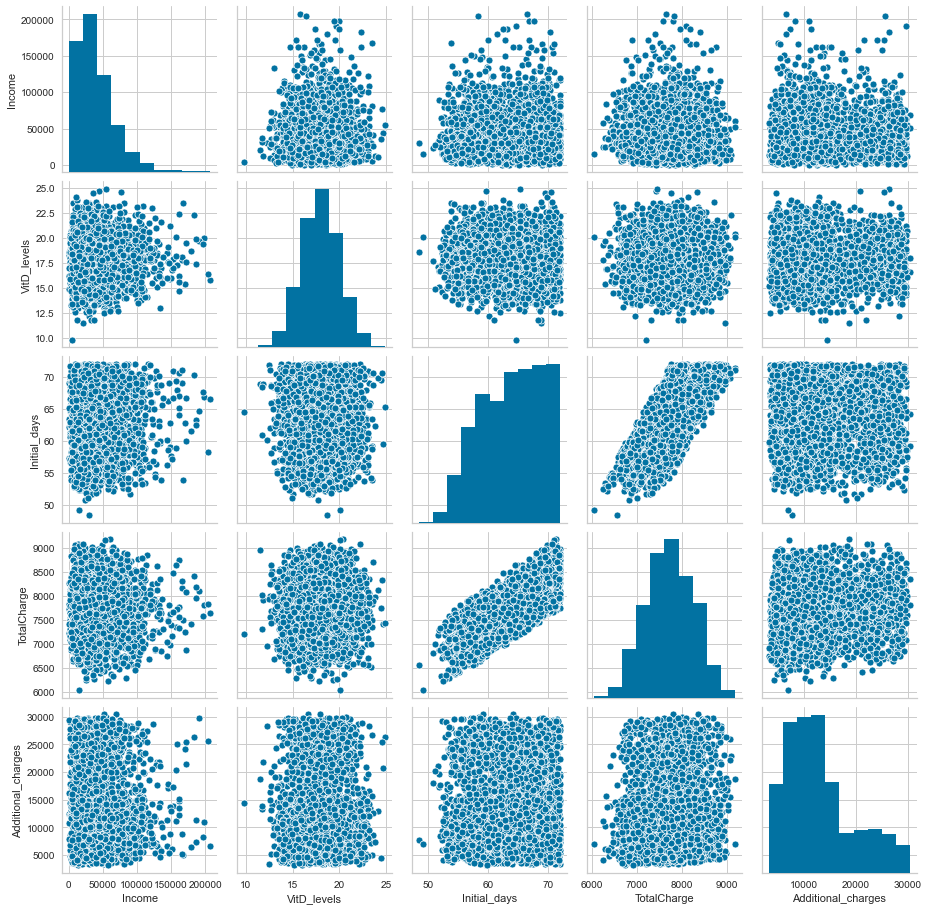

In [13]:
# describe combinations of numerical data
sns.pairplot(num_cols)

In [14]:
# describe scaled data
# we will not be using categorical data for this analysis

scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_cols.values)
df_standardized = pd.DataFrame(scaled_features,
        index=num_cols.index, 
      columns=num_cols.columns)

In [15]:
# The cluster analysis works best with 2 variables, we will be dropping Income, vit D levels, and initial days
final_df = df_standardized.drop(columns=['Income', 'VitD_levels','Initial_days'])

In [16]:
final_df

,TotalCharge,Additional_charges
5000,1.142798,2.400365
5001,-0.750662,0.169080
5005,-0.837581,-1.085610
5006,-1.380703,-0.410182
5008,0.097638,-0.563564
...,...,...
9992,0.312650,0.659869
9996,0.024683,2.362772
9997,1.034462,0.340855
9998,-0.158861,-0.805636


In [17]:
final_df.to_csv('prepared_dataset.csv')

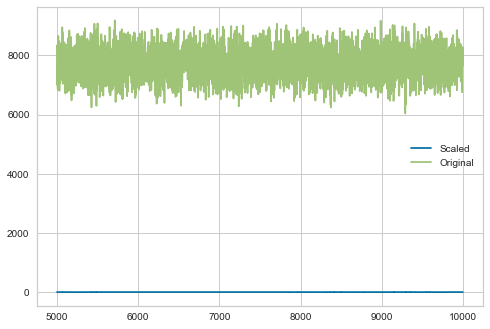

In [18]:
plt.plot(final_df['TotalCharge'], label = "Scaled")
plt.plot(num_cols['TotalCharge'], label = "Original")
plt.legend()
plt.show()

In [19]:
data = final_df[['TotalCharge','Additional_charges']]

### Part IV: Analysis

**D.  Perform the data analysis and report on the results by doing the following:**

**1. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.**

We will be using the Elbow Method to determine the optimal number of K for our analysis. We will use the KElbowVisualizer from yellowbrick.cluster to help visualize the elbow plot and find the optimal k. Our analysis below shows an "elbow" at a Within-Cluster Sum of Square score of 2717 when k = 3.

Using the results we interpreted from the elbow method, we run the K-Means Cluster at k=3. We show the clusters as different colors and plot using plt.scatter. Our clusters look proportionate, meaning that we have scaled the data well.

**2.  Provide the code used to perform the clustering analysis technique from part 2.**

Please see the below for the analysis.

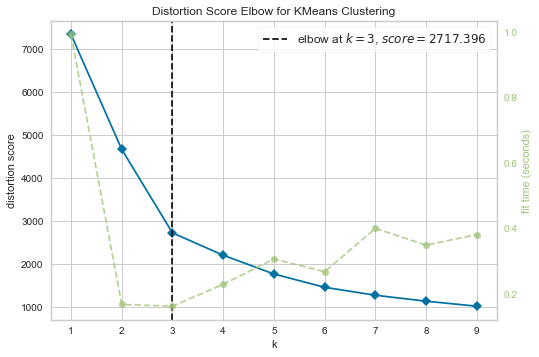

In [20]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,10))  # Specify the range of 'k' values to evaluate
visualizer.fit(data)  # Fit the visualizer with the dataset

visualizer.show()

In [21]:
# looks like k=3 gives us the best results, we will use 3 clusters for this analysis
kn = KMeans(n_clusters=3)
kn

KMeans(n_clusters=3)

In [22]:
y_predicted = kn.fit_predict(data)
y_predicted

array([2, 1, 1, ..., 0, 1, 0])

In [23]:
scaled_df=data.values
scaled_df

array([[ 1.1427982 ,  2.40036535],
       [-0.75066249,  0.16908039],
       [-0.83758088, -1.08561021],
       ...,
       [ 1.03446223,  0.3408554 ],
       [-0.15886102, -0.80563604],
       [ 0.30009784, -0.21530714]])

In [24]:
# create column 'cluster'

data['cluster']=y_predicted
data

,TotalCharge,Additional_charges,cluster
5000,1.142798,2.400365,2
5001,-0.750662,0.169080,1
5005,-0.837581,-1.085610,1
5006,-1.380703,-0.410182,1
5008,0.097638,-0.563564,0
...,...,...,...
9992,0.312650,0.659869,2
9996,0.024683,2.362772,2
9997,1.034462,0.340855,0
9998,-0.158861,-0.805636,1


Text(0, 0.5, 'Additional Charges')

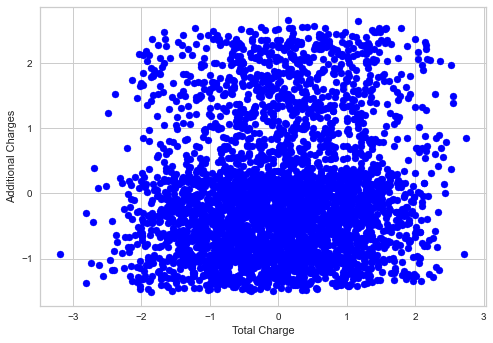

In [25]:
plt.scatter(data['TotalCharge'], data['Additional_charges'], color="blue", label = 'Cluster 1')


plt.xlabel('Total Charge')
plt.ylabel('Additional Charges')

Text(0, 0.5, 'Additional Charges')

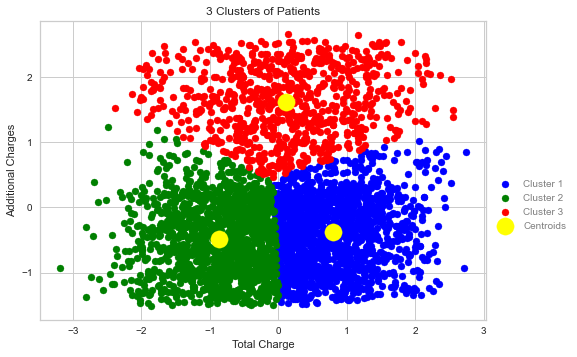

In [26]:
dfg1=data[data.cluster==0]
dfg2=data[data.cluster==1]
dfg3=data[data.cluster==2]

plt.scatter(dfg1['TotalCharge'], dfg1['Additional_charges'], color="blue", label = 'Cluster 1')
plt.scatter(dfg2['TotalCharge'], dfg2['Additional_charges'], color="green", label = 'Cluster 2')
plt.scatter(dfg3['TotalCharge'], dfg3['Additional_charges'], color="red", label = 'Cluster 3')

plt.scatter(kn.cluster_centers_[:, 0], kn.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

title_obj = plt.title('3 Clusters of Patients') #title

#legend
legend = plt.legend(bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_texts(), color='gray')


plt.xlabel('Total Charge')
plt.ylabel('Additional Charges')

In [27]:
data.groupby('cluster').mean()

,TotalCharge,Additional_charges
cluster,,
0,0.798849,-0.385313
1,-0.872535,-0.477512
2,0.116317,1.628333


### Part V: Data Summary and Implications

**E. Summarize your data analysis by doing the following:**


**1. Explain the accuracy of your clustering technique**

There are several method to describing the accuracy of the clustering analysis. For this analysis, we will be looking at the clustering tendency, number of clusters, and cluster quality (Manimaran, 2021).

* **Clustering tendency**: Analyzing the cluster tendency is described as critical as blindly applying clusters to a dataset can suboptimally inform the research question. When viewing the scatter plot (with variables TotalCharge and Additional_charges), we can see that the data is heavily concentrated towards the bottom of the chart. Additionally, we can see that the data has a tendency to "pull" in three directions. While the data is not perfectly divided into three clusters (this is rarely seen in real life analysis), it is apparant that there are clusters in the plot. The visual assessment of the clustering tendency is in line with what our analysis reveals.

* **Number of clusters**: As mentioned above, we can visually assess that our scatterplot has a tendency to cluster in three. This is consistent with our Elbow Method analysis. In our analysis we used the KElbowVisualizer from yellowbrick.cluster to help visualize an elbow plot to find the optimal k. Our analysis above showed an "elbow" at a Within-Cluster Sum of Square score of 2717 when k = 3 (Saji, 2023).

* **Clustering quality**: Clustering quality can be described as the tightness of the clusters. Our k-means plot above shows that the clusters are gathered around the centroid. Naturally, the clusters are not tightly bond to the centeroids, however, it is apparent that there are clusters and near their centroid.

**2. Discuss the results and implications of your clustering analysis.**

Our research question was "can we better understand the characteristics of the hospital's patients?" 

While this research question is broad, we have learned that when comparing patient's total charge and additional charge, there tends to be three main groups of patients. The centroids  suggest the three groups consist of: patients whose initital charge was below average and have no or below average additional charges, patients whose initital charge was above average and have no or below average additional charges, and patients whose initital charge was average and have above average additional charges.

It is interesting to see the differences of patient's initial charge in relation to their additional charge. Additional charges can possibly indicate a readmission into the hospital. It is quite intuitive, if the initial charge is above what is average that can indicate that there was more hospital care or if the initial charge is lower potentially due to less serious/complicated hospital care. You can assume that in these cases a rehospitalization is less likely as the data indicates. 

It might be worthwhile for the hospital to futher explore the group with average initial costs and high additional costs.

**3. Discuss one limitation of your data analysis.**

One limitation to the data analysis is that we are not directly able to work with the hospital staff to help answer questions that we come across in our analysis. In the real world, we would ideally be able to work directly with the hospital and explore/question the data and why there are certain patterns and tendencies in the data.


**4. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.**

We have found in our k-means analysis that there tends to be three main groups of patients. One of the three group consists of patients whose initital charge was average and have above average additional charges. These additional charges could indicate that there was a readmission.

I would recommend the hospital to compare the three groups of patients and identitfy what occurs in their visit that could cause additional charges and whether readmission is counted as additional charge. I would then recommend the hospital to use the procedures/hospital practices that occur in the visits to help prevent patients from readmission ultimately reducing their additional costs.

### Part VI: Demonstration

**F. Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.**

Panopto Link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=80cede87-01cc-4028-b81b-b0560188cc81

**G. Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.**

**H. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.**
 
“Assessing Clustering Tendency: A Vital Issue – Unsupervised Machine Learning: R-Bloggers.” R, 28 Oct. 2016, www.r-bloggers.com/2016/10/assessing-clustering-tendency-a-vital-issue-unsupervised-machine-learning/. 

Dabbura, Imad. “K-Means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks.” Medium, 27 Sept. 2022, towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a. 

Manimaran. “Clustering Evaluation Strategies.” Medium, 31 Jan. 2021, towardsdatascience.com/clustering-evaluation-strategies-98a4006fcfc. 

Saji, Basil. “Elbow Method for Finding the Optimal Number of Clusters in K-Means.” Analytics Vidhya, 11 July 2023, www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/. 

**I. Demonstrate professional communication in the content and presentation of your submission.**